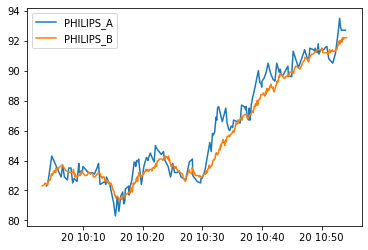

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df = pd.read_csv('store.csv')
df.columns = ["Type", "Instrument","Price","Buyer","Seller","Timestamp","Trade_nr","Volume","NAN"]
df = df.drop(labels="NAN",axis=1)
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

plt.plot(df[df["Instrument"] == "PHILIPS_A"]["Timestamp"],df[df["Instrument"] == "PHILIPS_A"]["Price"], label="PHILIPS_A")
plt.plot(df[df["Instrument"] == "PHILIPS_B"]["Timestamp"],df[df["Instrument"] == "PHILIPS_B"]["Price"], label="PHILIPS_B")
plt.legend(fontsize=10)
plt.show()

In [43]:
a_price = 0
b_price = 0
price_df = pd.DataFrame(columns=["Time", "Price_A", "Price_B"])

for i, r in enumerate(df.iterrows()):
    time = r[1]["Timestamp"]
    a_price = a_price if r[1]["Instrument"] != "PHILIPS_A" else r[1]["Price"]
    b_price = b_price if r[1]["Instrument"] != "PHILIPS_B" else r[1]["Price"]
    if a_price != 0 and b_price != 0:
        price_df.loc[i+1] = [time, a_price, b_price]
    
price_df["Difference"] = price_df["Price_A"] - price_df["Price_B"]

0     -0.2
1     -0.1
2      0.0
3      0.0
4     -0.2
      ... 
680    0.6
681    0.5
682    0.5
683    0.5
684    0.5
Name: Difference, Length: 685, dtype: float64


/Users/liumukun/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


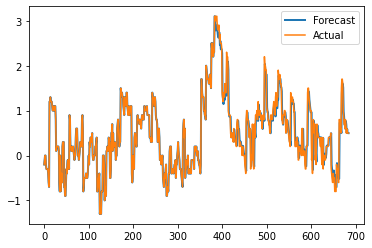

In [72]:
import math
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

diff = price_df["Difference"]
diff.reset_index(inplace=True, drop=True)

def rolling_forecast(df, test_size, order):
    forecast = list()

    for i in range(0,test_size):
        new_size = test_size-i
        train, test = df[:len(df)-new_size], df[len(df)-new_size:]
        model = ARIMA(train, order=order).fit()
        forecast.append(model.forecast().iloc[-1])

    forecast = df[:len(df)-test_size].append(pd.Series(forecast))
    forecast = forecast.reset_index()[0]
    
    return forecast

forecast = rolling_forecast(diff, 300, (1,0,1))
plt.plot(forecast, label="Forecast", linewidth=2)
plt.plot(diff, label="Actual")
plt.legend()

In [68]:
err = (pd.Series(diff)-pd.Series(forecast)).iloc[diff.shape[0]-300:]
sum(err**2)

27.64958322376886

,Time,Price_A,Price_B,Difference
5,2021-02-20 10:03:48,82.3,82.5,-0.2
6,2021-02-20 10:03:57,82.3,82.4,-0.1
7,2021-02-20 10:04:02,82.4,82.4,0.0
8,2021-02-20 10:04:03,82.4,82.4,0.0
9,2021-02-20 10:04:07,82.4,82.6,-0.2
...,...,...,...,...
685,2021-02-20 10:53:43,92.7,92.1,0.6
686,2021-02-20 10:53:46,92.7,92.2,0.5
687,2021-02-20 10:53:50,92.7,92.2,0.5
688,2021-02-20 10:54:01,92.7,92.2,0.5
